**Introduction**

Forecasting subscription growth is essential for businesses like Netflix to plan resources, optimize marketing strategies, and evaluate future opportunities. In this project, we aim to predict Netflix subscription counts using time series forecasting techniques.

By analyzing historical subscription data, we will explore patterns such as trends and seasonality, and apply models like ARIMA, Prophet, and LSTM to forecast future growth. The outcome will help demonstrate how data-driven forecasting can support better business decisions and long-term planning.

**Requirements**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from prophet import Prophet
import plotly.graph_objects as go

**Data Import**

In [ ]:
df = pd.read_csv("Netflix-Subscriptions.csv")

In [ ]:
df.head()

,Time Period,Subscribers
0,01/04/2013,34240000
1,01/07/2013,35640000
2,01/10/2013,38010000
3,01/01/2014,41430000
4,01/04/2014,46130000


**Exploratory Data Analysis (EDA)**

In [ ]:
df.tail()

,Time Period,Subscribers
37,01/07/2022,220670000
38,01/10/2022,223090000
39,01/01/2023,230750000
40,01/04/2023,232500000
41,01/07/2023,238390000


In [ ]:
df.shape

(42, 2)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Subscribers,42.0,1.304243e+08,6.891896e+07,34240000.0,67225000.0,121625000.0,201532500.0,238390000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Time Period  42 non-null     object
 1   Subscribers  42 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 804.0+ bytes


In [ ]:
df.isnull().sum()

,0
Time Period,0
Subscribers,0


**Data Preprocessing**

In [ ]:
df.rename(columns={"Time Period": "Date"}, inplace=True)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df = df.sort_values("Date").reset_index(drop=True)

In [ ]:
df.head()

,Date,Subscribers
0,2013-01-04,34240000
1,2013-01-07,35640000
2,2013-01-10,38010000
3,2014-01-01,41430000
4,2014-01-04,46130000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         42 non-null     datetime64[ns]
 1   Subscribers  42 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 804.0 bytes


**Data Visualization**

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df['Date'],
    y=df['Subscribers'],
    mode='lines+markers',
    name='Subscribers'
))
fig.update_layout(
    title='Netflix Quarterly Subscriptions Growth',
    xaxis_title='Date',
    yaxis_title='Netflix Subscribers',
    template='plotly_white'
)
fig.show()

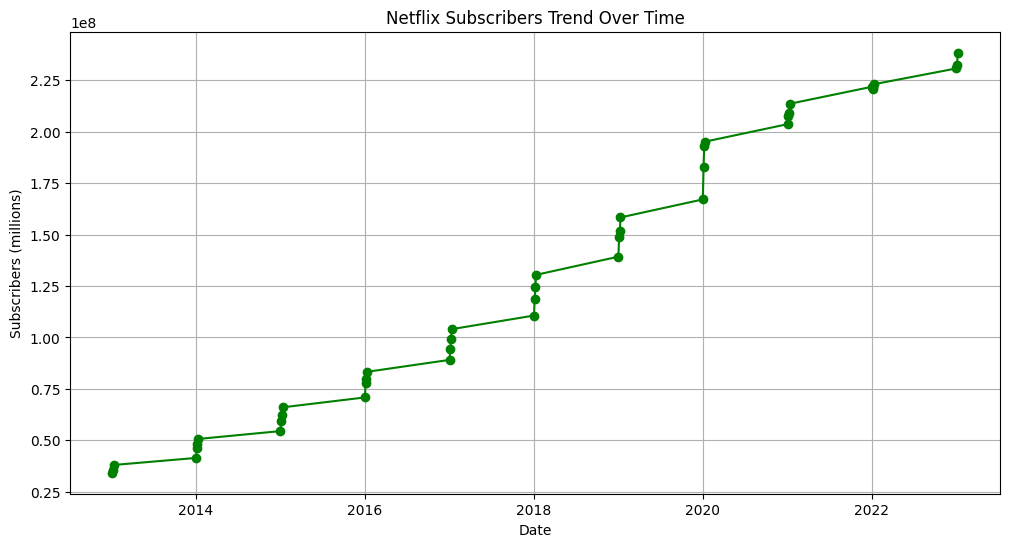

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Subscribers'], marker='o', linestyle='-', color='green')
plt.title("Netflix Subscribers Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Subscribers (millions)")
plt.grid(True)
plt.show()

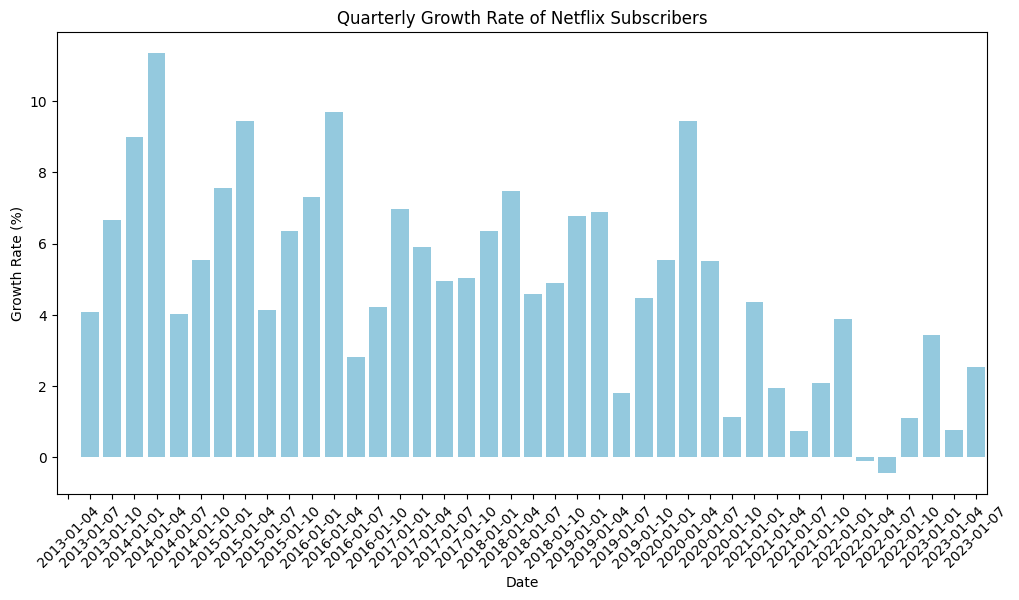

In [ ]:
df['Growth'] = df['Subscribers'].pct_change() * 100
plt.figure(figsize=(12,6))
sns.barplot(x=df['Date'], y=df['Growth'], color='skyblue')
plt.title("Quarterly Growth Rate of Netflix Subscribers")
plt.xlabel("Date")
plt.ylabel("Growth Rate (%)")
plt.xticks(rotation=45)
plt.show()

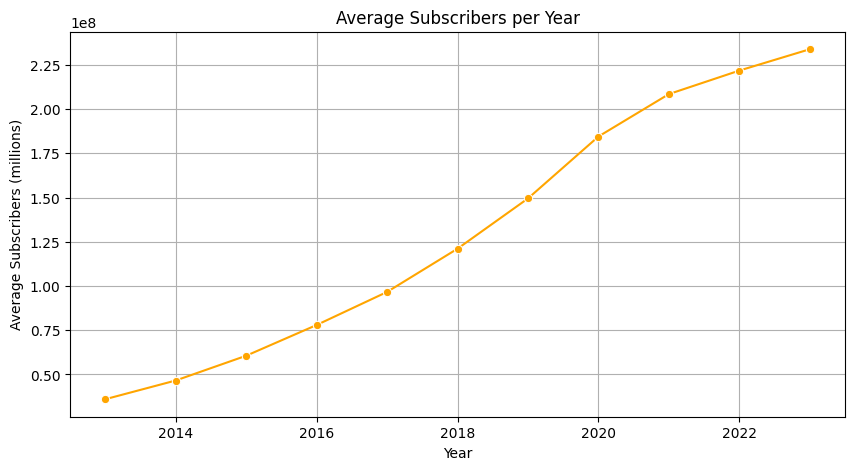

In [ ]:
df['Year'] = df['Date'].dt.year
yearly_avg = df.groupby('Year')['Subscribers'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='Subscribers', data=yearly_avg, marker='o', color='orange')
plt.title("Average Subscribers per Year")
plt.xlabel("Year")
plt.ylabel("Average Subscribers (millions)")
plt.grid(True)
plt.show()

In [ ]:
df['Bar Color'] = df['Growth'].apply(lambda x: 'green' if x > 0 else 'red')
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df['Date'],
    y=df['Growth'],
    marker_color=df['Bar Color'],
    name='Quarterly Growth Rate'
))

In [ ]:
fig.update_layout(
    title='Netflix Quarterly Subscriptions Growth Rate',
    xaxis_title='Date',
    yaxis_title='Quarterly Growth Rate (%)',
    template='plotly_white'
)
fig.show()

**ARIMA Forecasting**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
ts = df.set_index('Date')['Subscribers']

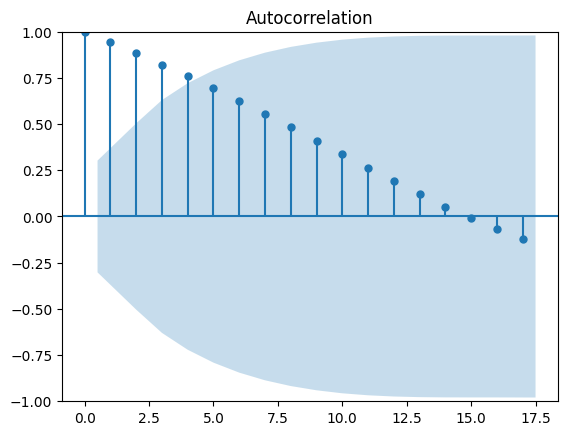

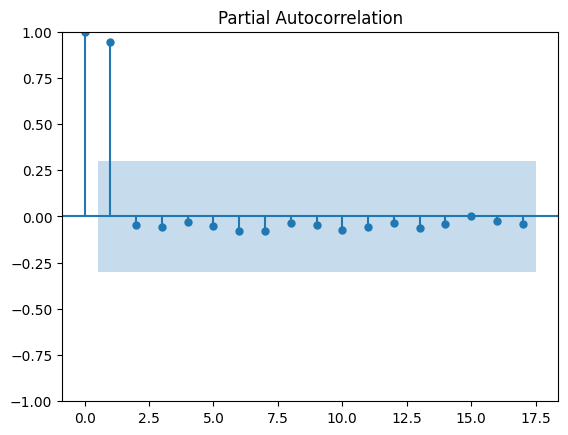

In [ ]:
plot_acf(ts); plt.show()
plot_pacf(ts); plt.show()

In [ ]:
model = ARIMA(ts, order=(1,1,1))
model_fit = model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Subscribers   No. Observations:                   42
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -672.993
Date:                Tue, 09 Sep 2025   AIC                           1351.986
Time:                        07:06:35   BIC                           1357.127
Sample:                             0   HQIC                          1353.858
                                 - 42                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9997      0.012     80.758      0.000       0.975       1.024
ma.L1         -0.9908      0.221     -4.476      0.000      -1.425      -0.557
sigma2      1.187e+13   1.57e-14   7.57e+26      0.000    1.19e+13    1.19e+13
===================================================================================
Ljung-Box (L1) (Q):                   3.96   Jarque-Bera (JB):                 4.62
Prob(Q):                              0.05   Prob(JB):                         0.10
Heteroskedasticity (H):               7.27   Skew:                             0.54
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.17e+42. Standard errors may be unstable.
"""

In [ ]:
forecast = model_fit.forecast(steps=4)
print("Forecasted Subscribers for next 4 quarters:")
forecast

Forecasted Subscribers for next 4 quarters:


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



,predicted_mean
42,2.433214e+08
43,2.482516e+08
44,2.531805e+08
45,2.581082e+08


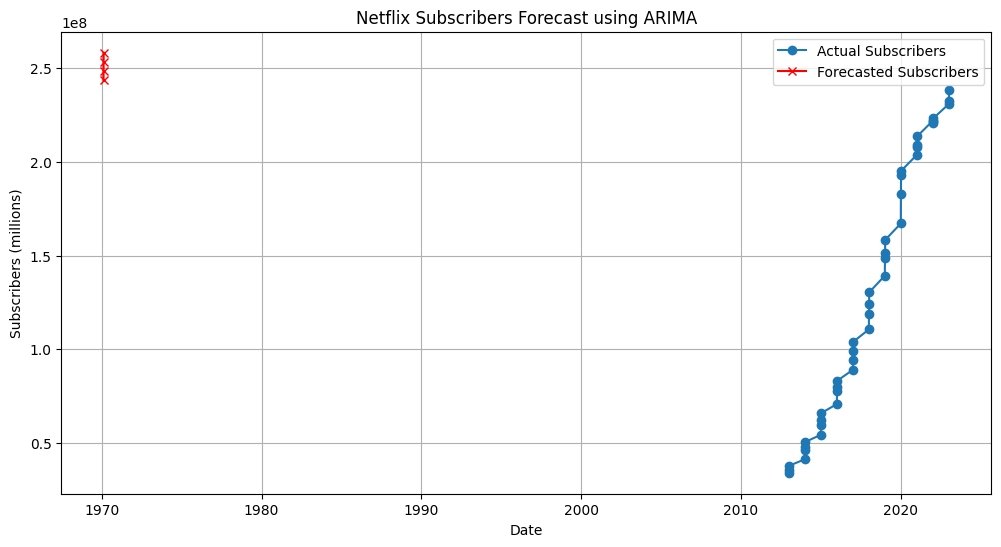

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(ts, label='Actual Subscribers', marker='o')
plt.plot(forecast.index, forecast.values, label='Forecasted Subscribers', marker='x', color='red')
plt.title("Netflix Subscribers Forecast using ARIMA")
plt.xlabel("Date")
plt.ylabel("Subscribers (millions)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pickle
with open('arima_model.pkl', 'wb') as pkl:
    pickle.dump(model_fit, pkl)

**Conclusion**

- We successfully analyzed Netflix quarterly subscriptions data and observed a clear upward trend over time.

- Quarterly growth rates show occasional fluctuations, indicating periods of faster or slower subscriber increase.

- Using ARIMA(1,1,1), we built a forecasting model to predict future subscribers, which captures the trend effectively.

- The model can forecast the next few quarters, helping Netflix plan resources and marketing strategies.

- For better accuracy, future work could include more historical data or seasonal models like SARIMA.